# 데이터 분석을 위한 전처리와 시각화 with 파이썬

## [시계열(Time Series) 데이터]

**판다스에서 시계열 데이터 표현에 자주 이용되는 시간 표시 방식**
1. **Timestamp** : 특정한 시점을 기록
1. **Period** : 두 시점 사이의 일정한 기간을 표시

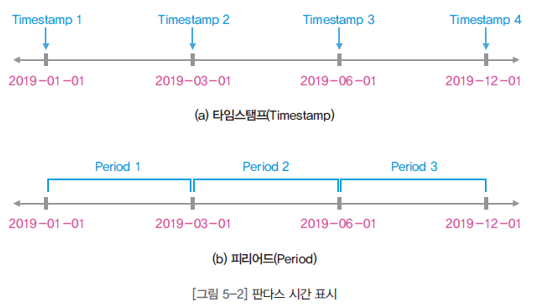

## 1. 다른 자료형을 시계열 객체로 변환

* 문자열, 숫자 등의 자료형으로 저장된 시간 데이터를 판다스의 시계열 객체(Timestamp, Period)로 변환

**주식 시장에서 거래되는 특정 종목의 거래 데이터를 정리한 CSV 파일을 불러와서 시계열 데이터 변환 및 활용**

In [4]:
import pandas as pd
# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('./stock-data.csv')

df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


* Date 열의 자료형 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


### 1) 문자열을 Timestamp로 변환

* **pd.to_datetime()** 함수 : 문자열 등 다른 자료형을 datetime64 자료형으로 변환 (Timestamp 데이터)

In [8]:
# 문자열 자료형 열(Date)을 판다스의 Timestamp로 변환 후
# 새로운 열(new_Date)을 생성해서 할당
df['new_Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


**new_Date 열의 자료형 확인**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


**type() 함수를 이용하여 new_Date 열 첫번째 데이터의 자료형 확인**

In [12]:
type(df['new_Date'][0]) # Timestamp 객체

pandas._libs.tslibs.timestamps.Timestamp

**시계열 값으로 변환된 열을 새로운 행 인덱스로 지정. 기존 날짜 열은 삭제**

In [14]:
# Date 열 삭제
df.drop('Date', axis = 1, inplace = True)
# new_Date 열을 행 인덱스로 지정
df.set_index('new_Date', inplace = True)

df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


**행 인덱스의 정보 확인**
   - 시계열 값(new_Date 열)을 행 인덱스 지정 : 시계열 인덱스 클래스(DatetimeIndex)로 설정됨

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


### 2) Timestamp를 Period로 변환

* **pd.to_period()** 함수 : Timestamp 객체를 Period 객체로 변환
  - freq 옵션 : 기준이 되는 기간 설정
    
  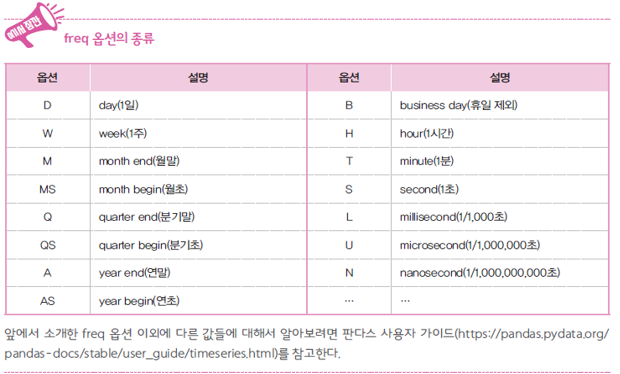

**날짜 형식의 문자열로 구성되는 리스트 정의**

In [19]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
dates

['2019-01-01', '2020-03-01', '2021-06-01']

**문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환**

In [21]:
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)

**Timestamp를 Period로 변환**

In [23]:
pr_day = ts_dates.to_period(freq = 'D') # 1일 단위 기간
pr_day

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')

In [24]:
pr_month = ts_dates.to_period(freq = 'M') # 1개월 단위 기간
pr_month

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')

In [25]:
pr_year = ts_dates.to_period(freq = 'Y') # 1년 단위 기간
pr_year

PeriodIndex(['2019', '2020', '2021'], dtype='period[Y-DEC]')

## 2. 시계열 데이터 만들기

### 1) Timestamp 배열

* **pd.date_range()** 함수 : 여러 개의 날짜(Timestamp)가 들어 있는 배열 형태의 시계열 데이터 생성

**Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준**

In [28]:
ts_ms = pd.date_range(start = '2019-01-01', # 시작 날짜 범위
                    end = None,           # 끝 날짜 범위 : 지정 X
                    periods = 6,          # 생성할 timestamp 개수
                    freq = 'MS',          # 시간 간격
                    tz = 'Asia/Seoul'     # 시간대
                   )
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

**Timestamp의 배열 만들기 - 월 간격, 월의 마지막 날 기준**

In [30]:
ts_me = pd.date_range(start = '2019-01-01', # 시작 날짜 범위
                    end = None,           # 끝 날짜 범위 : 지정 X
                    periods = 6,          # 생성할 timestamp 개수
                    freq = 'ME',          # 시간 간격
                    tz = 'Asia/Seoul'     # 시간대
                   )
ts_me

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='ME')

**Timestamp의 배열 만들기 - 분기(3개월) 간격, 월의 마지막 날 기준**

In [32]:
ts_q = pd.date_range(start = '2019-01-01', # 시작 날짜 범위
                    end = None,           # 끝 날짜 범위 : 지정 X
                    periods = 6,          # 생성할 timestamp 개수
                    #freq = '3MS',          # 시간 간격
                     freq = '3QS',          # 시간 간격
                    tz = 'Asia/Seoul'     # 시간대
                   )
ts_q

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2020-07-01 00:00:00+09:00', '2021-04-01 00:00:00+09:00',
               '2022-01-01 00:00:00+09:00', '2022-10-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3QS-JAN')

### 2) Period 배열

* **pd.period_range()** 함수 : 여러 개의 기간(Period)이 들어 있는 시계열 데이터 생성

**Period 배열 만들기 - 1개월 길이**

In [35]:
pr_m = pd.period_range(start = '2021-01-01',
                       end = None,
                       periods = 6,
                       freq = 'M'
                      )
pr_m

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'], dtype='period[M]')

**Period 배열 만들기 - 1시간 길이**

In [37]:
pr_h = pd.period_range(start = '2021-01-01',
                       end = None,
                       periods = 6,
                       freq = 'h'
                      )
pr_h

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00'],
            dtype='period[h]')

**Period 배열 만들기 - 2시간 길이**

In [39]:
pr_h = pd.period_range(start = '2021-01-01',
                       end = None,
                       periods = 6,
                       freq = '2h'
                      )
pr_h

PeriodIndex(['2021-01-01 00:00', '2021-01-01 02:00', '2021-01-01 04:00',
             '2021-01-01 06:00', '2021-01-01 08:00', '2021-01-01 10:00'],
            dtype='period[2h]')

## 3. 시계열 데이터 활용

### 1) 날짜 데이터 분리

In [41]:
# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./stock-data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


**문자열인 날짜 데이터를 판다스 Timestamp로 변환**

In [43]:
# new_Date 열을 새로 생성하고 Timestamp로 변환된 값 할당
df['new_Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


**dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분**

In [45]:
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day

df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


**Timestamp를 Period로 변환하여 년월일 표기 변경하기**

In [47]:
df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'Y')
df['Date_m'] = df['new_Date'].dt.to_period(freq = 'M')

df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06


**원하는 열을 새로운 행 인덱스로 지정**

In [49]:
df.set_index('Date_m', inplace = True)
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr
Date_m,,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018


### 2) 날짜 인덱스 활용

* DatetimeIndex, PeriodIndex로 변환된 열을 행 인덱스로 지정 : 시계열 데이터에 대한 인덱싱과 슬라이싱에 활용

In [51]:
# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


**문자열인 날짜 데이터를 판다스 Timestamp로 변환**

In [53]:
# timestamp 값을 저장하는 new_Date 열을 df에 추가
df['new_Date'] = pd.to_datetime(df['Date'])
# new_Date 열을 행 인덱스로 지정
df.set_index('new_Date', inplace = True)

df.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [54]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

**날짜 인덱스를 이용하여 데이터 선택하기**

In [56]:
# 2018년도 거래정보를 가지고 있는 행 추출
df_y = df.loc['2018']
df_y.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [57]:
# 2018년 7월 거래정보를 가지고 있는 행 추출
df_ym = df.loc['2018-07']
df_ym.head()

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977


In [58]:
# 2018년 7월 거래정보 중 Start 열부터 High 열까지 추출
df_ym_cols = df.loc['2018-07', 'Start':'High']
df_ym_cols.head()

,Start,High
new_Date,,
2018-07-02,10850,10900


In [59]:
# 2018년 6월 28일 거래 정보를 추출
df_ymd = df.loc['2018-06-28']
df_ymd.head()

Date     2018-06-28
Close         10400
Start         10900
High          10950
Low           10150
Name: 2018-06-28 00:00:00, dtype: object

In [60]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

In [61]:
# 2018년 6월 20일 ~ 2018년 6월 25일 사이의 거래 정보를 추출
df = df.sort_index()
df_ymd_range = df['2018-06-20':'2018-06-25']
df_ymd_range

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2018-06-20,2018-06-20,11550,11200,11600,10900,308596
2018-06-21,2018-06-21,11200,11350,11750,11200,133002
2018-06-22,2018-06-22,11300,11250,11450,10750,134805
2018-06-25,2018-06-25,11150,11400,11450,11000,55519


**시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기**

In [63]:
today = pd.to_datetime('2024-12-10') # 오늘 날짜를 기준일로 설정
df['time_delta'] = today - df.index  # 날짜 차이 계산

#df.head()

df.set_index('time_delta', inplace = True)

In [64]:
df.head()

,Date,Close,Start,High,Low,Volume
time_delta,,,,,,
2384 days,2018-06-01,11900,11800,12100,11750,32062
2381 days,2018-06-04,11900,11900,12200,11700,25171
2380 days,2018-06-05,12150,11800,12250,11800,42485
2378 days,2018-06-07,11950,12200,12300,11900,49088
2377 days,2018-06-08,11950,11950,12200,11800,59258


In [65]:
df_range = df['2390 days':'2370 days']

df_range

,Date,Close,Start,High,Low,Volume
time_delta,,,,,,
2384 days,2018-06-01,11900,11800,12100,11750,32062
2381 days,2018-06-04,11900,11900,12200,11700,25171
2380 days,2018-06-05,12150,11800,12250,11800,42485
2378 days,2018-06-07,11950,12200,12300,11900,49088
2377 days,2018-06-08,11950,11950,12200,11800,59258
2374 days,2018-06-11,11950,12000,12250,11950,62293
2373 days,2018-06-12,13200,12200,13300,12050,558148
2371 days,2018-06-14,13450,13200,13700,13150,347451
